In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
rice_north = pd.read_csv(r'raw_datas/rice/rice_north.csv')


In [176]:
rice_north.head(), rice_north.tail()

(       date    price
 0  01/01/16  2100.78
 1  01/02/16  2240.45
 2  01/03/16  2232.60
 3  01/04/16  2246.82
 4  01/05/16  2279.68,
          date    price
 100  01/05/24  3368.76
 101  01/06/24  3376.07
 102  01/07/24  3415.76
 103  01/08/24  3473.33
 104  01/09/24  3514.20)

In [177]:
print(rice_north.dtypes)

date      object
price    float64
dtype: object


In [178]:
rice_north['date'] = pd.to_datetime(rice_north['date'], format='%d/%m/%y')

In [179]:
print(rice_north.dtypes)

date     datetime64[ns]
price           float64
dtype: object


In [180]:
rice_north['price'] = pd.to_numeric(rice_north['price'], errors='coerce')

In [181]:
print(rice_north.dtypes)

date     datetime64[ns]
price           float64
dtype: object


In [182]:
rice_north.set_index('date', inplace=True)


<Axes: xlabel='date'>

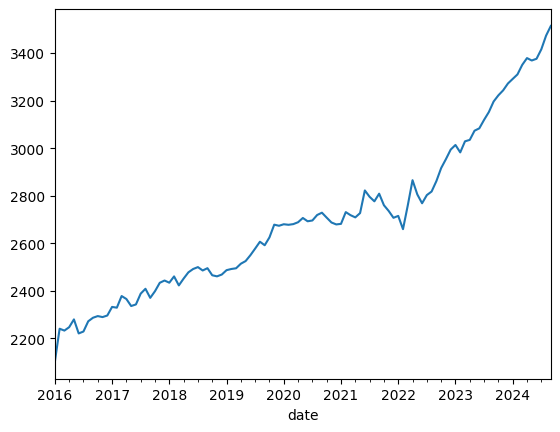

In [183]:
rice_north['price'].plot()

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rice_north['price'] = scaler.fit_transform(rice_north[['price']])

In [185]:
rice_north.shape

(105, 1)

In [186]:
price = rice_north['price']

<Axes: xlabel='date'>

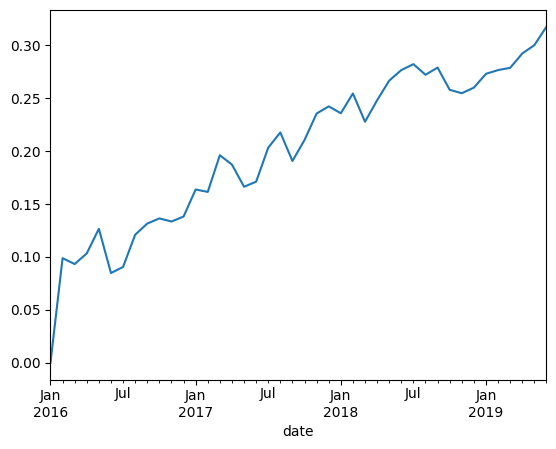

In [187]:
price[:42].plot()

In [188]:
rice_north

,price
date,
2016-01-01,0.000000
2016-02-01,0.098817
2016-03-01,0.093263
2016-04-01,0.103324
2016-05-01,0.126572
...,...
2024-05-01,0.897101
2024-06-01,0.902273
2024-07-01,0.930353


# Model Building
## Spliting and Conversation


In [189]:
#prdicting new point using past 12 records
def df_to_X_y(df, size = 12):
    df_as_numpy = df.to_numpy()
    X, y = [], []
    
    for x in range(len(df_as_numpy) - size):
        row = [[a] for a in df_as_numpy[x:x+12]]
        X.append(row)
        label = df_as_numpy[x+12]
        y.append(label)
    
    return np.array(X), np.array(y)


In [190]:
size = 12
X, y = df_to_X_y(price, size)
X.shape, y.shape

((93, 12, 1), (93,))

In [191]:
X

array([[[0.        ],
        [0.09881705],
        [0.09326315],
        ...,
        [0.13639965],
        [0.13346351],
        [0.13812596]],

       [[0.09881705],
        [0.09326315],
        [0.10332385],
        ...,
        [0.13346351],
        [0.13812596],
        [0.1637093 ]],

       [[0.09326315],
        [0.10332385],
        [0.12657243],
        ...,
        [0.13812596],
        [0.1637093 ],
        [0.16143821]],

       ...,

       [[0.72044403],
        [0.74367845],
        [0.77502795],
        ...,
        [0.90424644],
        [0.89710065],
        [0.9022725 ]],

       [[0.74367845],
        [0.77502795],
        [0.79347965],
        ...,
        [0.89710065],
        [0.9022725 ],
        [0.93035333]],

       [[0.77502795],
        [0.79347965],
        [0.80829477],
        ...,
        [0.9022725 ],
        [0.93035333],
        [0.97108432]]])

In [192]:
y

array([0.1637093 , 0.16143821, 0.19608467, 0.1872621 , 0.16634121,
       0.17106734, 0.20324461, 0.21764939, 0.19065104, 0.21049653,
       0.23551386, 0.24227052, 0.23578979, 0.25449619, 0.22775254,
       0.2480296 , 0.26662988, 0.27658445, 0.28218081, 0.27214841,
       0.27896167, 0.25792758, 0.25469429, 0.26001472, 0.27305401,
       0.27657738, 0.27871404, 0.29226981, 0.30015848, 0.31756307,
       0.33735195, 0.35772099, 0.34724993, 0.37066831, 0.40849146,
       0.40522279, 0.40974374, 0.40812356, 0.41014702, 0.4157646 ,
       0.42840062, 0.41859461, 0.42095768, 0.43727271, 0.44412843,
       0.4293699 , 0.4149722 , 0.40921311, 0.4109182 , 0.44587596,
       0.43673501, 0.4301623 , 0.44294689, 0.51035786, 0.4913826 ,
       0.47794003, 0.50072873, 0.46635112, 0.4492649 , 0.42893832,
       0.4345842 , 0.39511964, 0.46570022, 0.54085834, 0.49854254,
       0.47215973, 0.49654031, 0.50718116, 0.5382052 , 0.57691981,
       0.60355733, 0.63197068, 0.6456821 , 0.62359384, 0.65659

In [193]:
train_size = int(len(price) * 0.6)
val_size = int(len(price) * 0.15) + train_size
test_size = len(price) - val_size

train_size, val_size, test_size

(63, 78, 27)

In [194]:
x_train, y_train = X[:train_size], y[:train_size]
x_val, y_val = X[train_size:val_size], y[train_size:val_size]
x_test, y_test = X[val_size:], y[val_size:]


In [195]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((63, 12, 1), (63,), (15, 12, 1), (15,), (15, 12, 1), (15,))

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# model1 = Sequential()
# model1.add(InputLayer((5, 1)))
# model1.add(LSTM(64))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(1, 'linear'))

# model1.summary()

In [197]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model architecture
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=64, return_sequences=True, input_shape=(12, 1)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout regularization
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer without return_sequences (last layer in the LSTM stack)
model.add(LSTM(units=32))
model.add(Dropout(0.2))

# Output layer with one unit (for regression task)
model.add(Dense(1))

# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


/Users/a2024/Desktop/SIH/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 12, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 12, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,369 (243.63 KB)

 Trainable params: 62,369 (243.63 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
cp = ModelCheckpoint('models/rice_north.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [87]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, callbacks=[cp])


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0627 - root_mean_squared_error: 0.2504 - val_loss: 0.2068 - val_root_mean_squared_error: 0.4547
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0571 - root_mean_squared_error: 0.2390 - val_loss: 0.1955 - val_root_mean_squared_error: 0.4421
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0555 - root_mean_squared_error: 0.2355 - val_loss: 0.1839 - val_root_mean_squared_error: 0.4288
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0493 - root_mean_squared_error: 0.2220 - val_loss: 0.1722 - val_root_mean_squared_error: 0.4149
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0455 - root_mean_squared_error: 0.2134 - val_loss: 0.1603 - val_root_mean_squared_error: 0.4004
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0415 - root_mean_squared_error: 0.2036 - val_loss: 0.1484 - val_root_mean_squared_error: 0.3852
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0377 - root

In [198]:
from tensorflow.keras.models import load_model
rice_north_model = load_model('models/rice_north.keras')


In [199]:
date = pd.DataFrame(rice_north.index)
date.reset_index(drop=True, inplace=True)


In [200]:
train_predictions = rice_north_model.predict(x_train)
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))

train_predictions, y_train


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


(array([[2428.8162],
        [2442.3953],
        [2446.057 ],
        [2451.341 ],
        [2456.592 ],
        [2460.206 ],
        [2469.0215],
        [2477.8826],
        [2484.2188],
        [2490.0356],
        [2495.9402],
        [2502.914 ],
        [2510.2007],
        [2515.4736],
        [2521.8792],
        [2525.1492],
        [2530.0754],
        [2538.0112],
        [2546.1396],
        [2551.471 ],
        [2555.9258],
        [2564.0183],
        [2570.2249],
        [2573.7637],
        [2576.5796],
        [2580.16  ],
        [2581.7246],
        [2586.3823],
        [2588.954 ],
        [2589.8071],
        [2590.1763],
        [2590.8608],
        [2593.917 ],
        [2597.4846],
        [2604.795 ],
        [2614.081 ],
        [2624.409 ],
        [2634.86  ],
        [2646.3435],
        [2658.7876],
        [2670.6892],
        [2682.5737],
        [2693.1294],
        [2701.9143],
        [2708.8628],
        [2717.4946],
        [2723.7583],
        [2725

In [201]:
date = np.ravel(date)  # or date.flatten()
train_predictions = np.ravel(train_predictions)
y_train = np.ravel(y_train)

In [203]:
min_length = min(len(date), len(train_predictions), len(y_train))
date = date[:min_length]
train_predictions = train_predictions[:min_length]
y_train = y_train[:min_length]


In [204]:
train_results = pd.DataFrame(data={'date': date, 'train_predictions': train_predictions, 'actual': y_train})

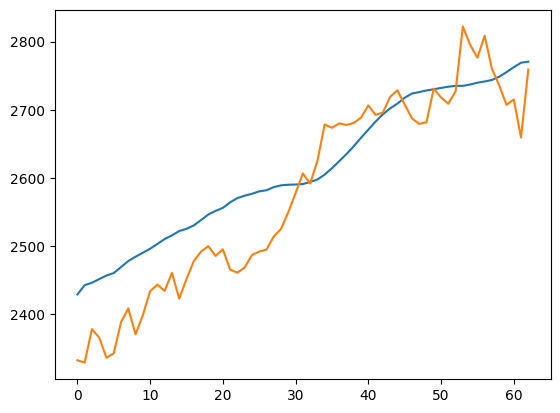

In [206]:
plt.plot(train_results['train_predictions'])
plt.plot(train_results['actual'])

In [207]:
test_predictions = rice_north_model.predict(x_test)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

test_predictions, y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


(array([[2883.955 ],
        [2902.8245],
        [2922.2285],
        [2939.9587],
        [2955.295 ],
        [2969.7524],
        [2983.245 ],
        [2997.4993],
        [3016.4993],
        [3033.8982],
        [3052.992 ],
        [3070.9111],
        [3089.7117],
        [3107.2354],
        [3123.875 ]], dtype=float32),
 array([[3119.07],
        [3151.91],
        [3196.22],
        [3222.3 ],
        [3243.24],
        [3272.01],
        [3291.22],
        [3310.15],
        [3350.36],
        [3378.86],
        [3368.76],
        [3376.07],
        [3415.76],
        [3473.33],
        [3514.2 ]]))

In [208]:
test_predictions = np.ravel(test_predictions)
y_test = np.ravel(y_test)

In [209]:
test_results = pd.DataFrame(data={'test_predictions': test_predictions, 'actual': y_test})

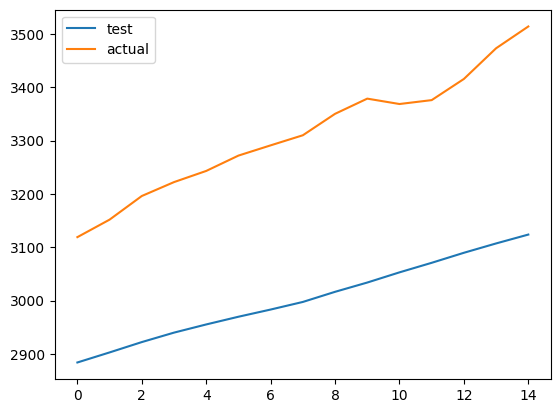

In [215]:
plt.plot(test_results['test_predictions'], label='test')
plt.plot(test_results['actual'], label='actual')
plt.legend()
plt.show()